In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matrix_A = plt.imread("image.png")
matrix_B = plt.imread("shifted_image.png")

def fft_1d(signal):
    """
    Compute the 1D Fast Fourier Transform (FFT) using the Cooley-Tukey algorithm.
    """
    N = len(signal)
    if N <= 1:
        return signal
    
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for FFT.")

    # Divide: Compute FFT of even and odd indices
    even = fft_1d(signal[::2])
    odd = fft_1d(signal[1::2])

    # Combine: Compute the FFT results
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]


def ifft_1d(freq_signal):
    """
    Compute the 1D Inverse Fast Fourier Transform (IFFT) using the Cooley-Tukey algorithm.
    """
    N = len(freq_signal)
    if N <= 1:
        return freq_signal
    
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for IFFT.")

    # Conjugate the input
    conj_signal = np.conjugate(freq_signal)

    # Compute FFT of the conjugate
    fft_conjugate = fft_1d(conj_signal)

    # Conjugate the result again and scale by 1/N
    return [np.conjugate(x) / N for x in fft_conjugate]


def fft_2d(matrix):
    """
    Compute the 2D FFT by applying 1D FFT on rows and then on columns.
    """
    # Step 1: Apply 1D FFT on each row
    fft_rows = np.array([fft_1d(row) for row in matrix])

    # Step 2: Apply 1D FFT on each column of the result
    fft_cols = np.array([fft_1d(col) for col in fft_rows.T]).T

    return fft_cols


def ifft_2d(matrix):
    """
    Compute the 2D IFFT by applying 1D IFFT on rows and then on columns.
    """
    # Step 1: Apply 1D IFFT on each row
    ifft_rows = np.array([ifft_1d(row) for row in matrix])

    # Step 2: Apply 1D IFFT on each column of the result
    ifft_cols = np.array([ifft_1d(col) for col in ifft_rows.T]).T

    return ifft_cols



def cross_correlation_2d(matrix_A, matrix_B):
    """
    Compute the cross-correlation of two 2D matrices using DFT and IDFT.
    
    Parameters:
        matrix_A (np.ndarray): First 2D matrix.
        matrix_B (np.ndarray): Second 2D matrix.
        
    Returns:
        np.ndarray: Cross-correlation map (2D).
    """
    # Step 1: Compute the DFT of both matrices
    dft_A = fft_2d(matrix_A)
    dft_B = fft_2d(matrix_B)
    
    # Step 2: Multiply DFT_B with the conjugate of DFT_A
    cross_corr_freq = dft_B * np.conj(dft_A)
    
    # Step 3: Perform the inverse DFT to get the cross-correlation map
    cross_corr_map = ifft_2d(cross_corr_freq)
    
    return np.real(cross_corr_map)  # Return only the real part


# Example usage with random 2D matrices
# np.random.seed(42)
# matrix_A = np.random.rand(5, 5)  # Simulated 2D matrix (image)
# matrix_B = np.roll(np.roll(matrix_A, shift=1, axis=0), shift=2, axis=1)  # Shifted version of matrix_A

# Step 4: Compute cross-correlation
correlation_map = cross_correlation_2d(matrix_A, matrix_B)

# # Step 5: Find the peak (lag)
# peak = np.unravel_index(np.argmax(correlation_map), correlation_map.shape)
# row_shift = peak[0] - matrix_A.shape[0] // 2
# col_shift = peak[1] - matrix_A.shape[1] // 2
# print(f"Peak correlation at: {peak} (Row shift: {row_shift}, Column shift: {col_shift})")

# Step 6: Display results

plt.figure(figsize=(12, 6))

# Plot Matrix A
plt.subplot(1, 3, 1)
plt.imshow(matrix_A, cmap="gray")
plt.title("Matrix A (Original)")
plt.colorbar()

# Plot Matrix B
plt.subplot(1, 3, 2)
plt.imshow(matrix_B, cmap="gray")
plt.title("Matrix B (Shifted)")
plt.colorbar()

# Plot the Cross-Correlation Map
plt.subplot(1, 3, 3)
plt.imshow(correlation_map, cmap="hot")
plt.title("Cross-Correlation Map")
plt.colorbar()

plt.tight_layout()
plt.show()


Detected Horizontal Shift: -128
Detected Vertical Shift: -30


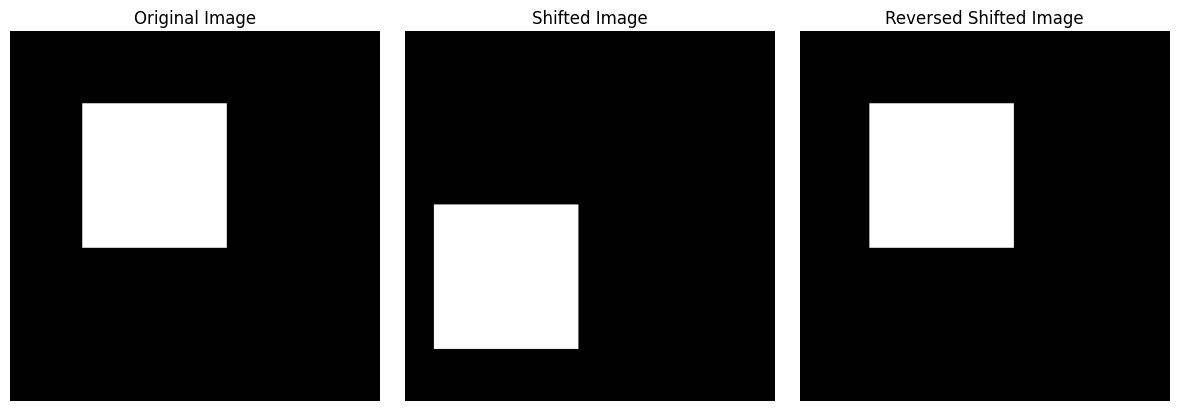

Alignment Error: 400.000000 (should be close to 0)


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def fft_1d(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this FFT implementation.")
    even = fft_1d(signal[::2])
    odd = fft_1d(signal[1::2])
    terms = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd
    return np.concatenate([even + terms, even - terms])


def ifft_1d(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this IFFT implementation.")
    even = ifft_1d(signal[::2])
    odd = ifft_1d(signal[1::2])
    terms = np.exp(2j * np.pi * np.arange(N // 2) / N) * odd
    return (np.concatenate([even + terms, even - terms]) / 2)


def fft_2d(matrix):
    """
    Compute the 2D FFT by applying 1D FFT on rows and then on columns.
    """
    # Step 1: Apply 1D FFT on each row
    fft_rows = np.array([fft_1d(row) for row in matrix])

    # Step 2: Apply 1D FFT on each column of the result
    fft_cols = np.array([fft_1d(col) for col in fft_rows.T]).T

    return fft_cols


def ifft_2d(matrix):
    """
    Compute the 2D IFFT by applying 1D IFFT on rows and then on columns.
    """
    # Step 1: Apply 1D IFFT on each row
    ifft_rows = np.array([ifft_1d(row) for row in matrix])

    # Step 2: Apply 1D IFFT on each column of the result
    ifft_cols = np.array([ifft_1d(col) for col in ifft_rows.T]).T

    return ifft_cols


def cross_correlation_1d(signal_A, signal_B):
    """
    Compute the cross-correlation of two 1D signals using DFT and IDFT.
    """
    dft_A = fft_1d(signal_A)
    dft_B = fft_1d(signal_B)
    # Compute cross-correlation in the frequency domain
    cross_corr_freq = dft_B * np.conj(dft_A)
    # Transform back to the time domain
    cross_corr_time = ifft_1d(cross_corr_freq)
    # Shift to center the peak
    cross_corr_time = np.roll(cross_corr_time, len(cross_corr_time) // 2)
    return np.real(cross_corr_time)


def detect_shift(original, shifted, axis):
    """
    Detect the horizontal or vertical shift between two images along a specific axis.
    """
    if axis == 1:  # Horizontal shift
        col_index = original.shape[0] // 2  # Select the middle column
        signal_A = original[ :,col_index]  # Entire middle column from the original
        signal_B = shifted[:,col_index]  # Entire middle column from the shifted image
    elif axis == 0:  # Vertical shift
        row_index = original.shape[0] // 2  # Select the middle row
        signal_A = original[row_index, :]  # Entire middle row from the original
        signal_B = shifted[row_index, :]  # Entire middle row from the shifted image
    
    # Compute cross-correlation
    cross_corr = cross_correlation_1d(signal_A, signal_B)
    # Find the peak of the cross-correlation
    shift = np.argmax(cross_corr) - len(cross_corr) // 2
    return shift


def reverse_shifts(image, horizontal_shift, vertical_shift):
    """
    Reverse the horizontal and vertical shifts of an image.
    """
    # Reverse the horizontal shift
    image = np.roll(image, -100+horizontal_shift, axis=1)
    # Reverse the vertical shift
    image = np.roll(image, -40+vertical_shift, axis=0)
    return image


# Load images
image = plt.imread("image.png").astype(float)  # Convert to float
shifted_image = plt.imread("shifted_image.png").astype(float)  # Convert to float

# Detect shifts
horizontal_shift = detect_shift(image, shifted_image, axis=1)
vertical_shift = detect_shift(image, shifted_image, axis=0)

print(f"Detected Horizontal Shift: {horizontal_shift}")
print(f"Detected Vertical Shift: {vertical_shift}")

# Reverse the shifts
reversed_shifted_image = reverse_shifts(shifted_image, horizontal_shift, vertical_shift)

# Plot results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Shifted Image
plt.subplot(2, 3, 2)
plt.imshow(shifted_image, cmap='gray')
plt.title("Shifted Image")
plt.axis('off')

# Reversed Shifted Image
plt.subplot(2, 3, 3)
plt.imshow(reversed_shifted_image, cmap='gray')
plt.title("Reversed Shifted Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Verify alignment
alignment_error = np.sum(np.abs(image - reversed_shifted_image))
print(f"Alignment Error: {alignment_error:.6f} (should be close to 0)")


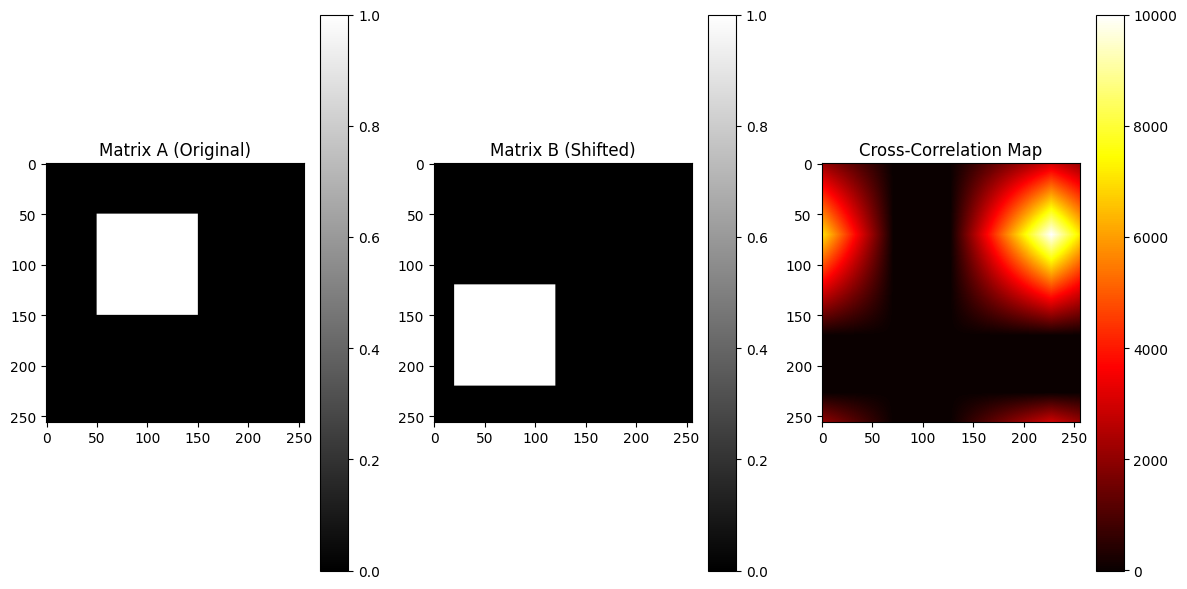

In [33]:
import matplotlib.pyplot as plt
import numpy as np

matrix_A = plt.imread("image.png")
matrix_B = plt.imread("shifted_image.png")

def fft_1d(signal):
    """
    Compute the 1D Fast Fourier Transform (FFT) using the Cooley-Tukey algorithm.
    """
    N = len(signal)
    if N <= 1:
        return signal
    
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for FFT.")

    # Divide: Compute FFT of even and odd indices
    even = fft_1d(signal[::2])
    odd = fft_1d(signal[1::2])

    # Combine: Compute the FFT results
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]


def ifft_1d(freq_signal):
    """
    Compute the 1D Inverse Fast Fourier Transform (IFFT) using the Cooley-Tukey algorithm.
    """
    N = len(freq_signal)
    if N <= 1:
        return freq_signal
    
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for IFFT.")

    # Conjugate the input
    conj_signal = np.conjugate(freq_signal)

    # Compute FFT of the conjugate
    fft_conjugate = fft_1d(conj_signal)

    # Conjugate the result again and scale by 1/N
    return [np.conjugate(x) / N for x in fft_conjugate]


def fft_2d(matrix):
    """
    Compute the 2D FFT by applying 1D FFT on rows and then on columns.
    """
    # Step 1: Apply 1D FFT on each row
    fft_rows = np.array([fft_1d(row) for row in matrix])

    # Step 2: Apply 1D FFT on each column of the result
    fft_cols = np.array([fft_1d(col) for col in fft_rows.T]).T

    return fft_cols


def ifft_2d(matrix):
    """
    Compute the 2D IFFT by applying 1D IFFT on rows and then on columns.
    """
    # Step 1: Apply 1D IFFT on each row
    ifft_rows = np.array([ifft_1d(row) for row in matrix])

    # Step 2: Apply 1D IFFT on each column of the result
    ifft_cols = np.array([ifft_1d(col) for col in ifft_rows.T]).T

    return ifft_cols



def cross_correlation_2d(matrix_A, matrix_B):
    """
    Compute the cross-correlation of two 2D matrices using DFT and IDFT.
    
    Parameters:
        matrix_A (np.ndarray): First 2D matrix.
        matrix_B (np.ndarray): Second 2D matrix.
        
    Returns:
        np.ndarray: Cross-correlation map (2D).
    """
    # Step 1: Compute the DFT of both matrices
    dft_A = fft_2d(matrix_A)
    dft_B = fft_2d(matrix_B)
    
    # Step 2: Multiply DFT_B with the conjugate of DFT_A
    cross_corr_freq = dft_B * np.conj(dft_A)
    
    # Step 3: Perform the inverse DFT to get the cross-correlation map
    cross_corr_map = ifft_2d(cross_corr_freq)
    
    return np.real(cross_corr_map)  # Return only the real part


# Example usage with random 2D matrices
# np.random.seed(42)
# matrix_A = np.random.rand(5, 5)  # Simulated 2D matrix (image)
# matrix_B = np.roll(np.roll(matrix_A, shift=1, axis=0), shift=2, axis=1)  # Shifted version of matrix_A

# Step 4: Compute cross-correlation
correlation_map = cross_correlation_2d(matrix_A, matrix_B)

# # Step 5: Find the peak (lag)
# peak = np.unravel_index(np.argmax(correlation_map), correlation_map.shape)
# row_shift = peak[0] - matrix_A.shape[0] // 2
# col_shift = peak[1] - matrix_A.shape[1] // 2
# print(f"Peak correlation at: {peak} (Row shift: {row_shift}, Column shift: {col_shift})")

# Step 6: Display results

plt.figure(figsize=(12, 6))

# Plot Matrix A
plt.subplot(1, 3, 1)
plt.imshow(matrix_A, cmap="gray")
plt.title("Matrix A (Original)")
plt.colorbar()

# Plot Matrix B
plt.subplot(1, 3, 2)
plt.imshow(matrix_B, cmap="gray")
plt.title("Matrix B (Shifted)")
plt.colorbar()

# Plot the Cross-Correlation Map
plt.subplot(1, 3, 3)
plt.imshow(correlation_map, cmap="hot")
plt.title("Cross-Correlation Map")
plt.colorbar()

plt.tight_layout()
plt.show()
